In [1]:
from glob import glob
import mne
from mne.viz import plot_topomap

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
csv_file = pd.read_csv("/Users/niraj/Desktop/Research Works/OneDrive_1_1-19-2024/Study Sample List-4-Wang.20231220.csv")
df = pd.DataFrame(csv_file,)

Here, I am removing the unnecessary features from the csv files to better visualize the contents of the dataframe.

In [ ]:
df.drop(['entry_id','Unnamed: 5','visit_description','cpt_code','icd_1','icd_2','icd_3','icd_4','icd_5','icd_6','Date Generated','Series #','Unnamed: 17'],axis = 'columns',inplace=True)
patients_to_remove = ['SN00003','SN00004','SN00005','SN00006','SN00010','SN00011','SN00012','SN00013','SN00014','SN00015']
df = df[~df['recode_id'].isin(patients_to_remove)]
df.head()


In [ ]:
yes_patients = df.loc[df['Adiease'] == 'Y', 'recode_id'].tolist()
for i in range(len(yes_patients)):
    yes_patients[i] = yes_patients[i] + '.EDF'

In [8]:
yes_patients[0],yes_patients[1] = 'SN0001.EDF','SN0002.EDF'

In [9]:
# yes_data = []

# for patient in yes_patients:
#     path = "/Users/niraj/Desktop/Research Works/OneDrive_1_1-19-2024/" + patient 
#     patient_data = sorted(glob(path))
#     yes_data.extend(patient_data)

In [10]:
# no_patients = df.loc[df['Adiease'] == 'N', 'recode_id'].tolist()
# for i in range(len(no_patients)):
#     no_patients[i] = no_patients[i] + '.EDF'

In [11]:
# no_data = []
# for patient in no_patients:
#     path = "/Users/niraj/Desktop/Research Works/OneDrive_1_1-19-2024/" + patient 
#     patient_data = sorted(glob(path))
#     no_data.extend(patient_data)

In [12]:
# yes_train=[]
# for i in range(len(yes_data)):
#     raw = mne.io.read_raw_edf(yes_data[i],infer_types=False,preload=False)
#     yes_train.append(raw)

In [13]:
# no_train=[]
# for i in range(len(no_data)):
#     raw = mne.io.read_raw_edf(no_data[i],infer_types=False,preload=False)
#     no_train.append(raw)


In [14]:

# for i in range(len(yes_train)):
#     print(f"The below one  is the graph of {yes_train[i]}")
#     folder_path = "/Users/niraj/Desktop/Research Works/yes/"
#     file_name = f"EDF{i}" + '.png'
#     file_path = folder_path + file_name
#     fig = yes_train[i].plot(start=60,
#                       duration = 120,
#                       scalings=dict(eeg=1e-3,resp=1e-3),title = f"{yes_train[i]}",)
    
#     fig.savefig(file_path)
#     plt.show()

In [22]:
# for i in range(len(no_train)):
#     print(f"The below one is the graph of {no_train[i]}")
#     file_name = f"EDF{i}" + '.png'
#     folder_path = "/Users/niraj/Desktop/Research Works/no/"
#     file_path = folder_path + file_name

#     fig = no_train[i].plot(start=60,
#                       duration = 120,
#                       scalings=dict(eeg=1e-3,resp=1e-3),title = f"{no_train[i]}") 
#     fig.savefig(file_path)
#     plt.show()

In [16]:
# df[df['Adiease']=='Y']['recode_id']
# [i + '.EDF' for i in df[df['Adiease']=='Y']['recode_id']]
# patients_to_remove = ['SN00003','SN00004','SN00005','SN00006','SN00010','SN00011','SN00012','SN00013','SN00014','SN00015']
# df.drop(['entry_id','Unnamed: 5','visit_description','cpt_code','icd_1','icd_2','icd_3','icd_4','icd_5','icd_6','Date Generated','Series #','Unnamed: 17'],axis = 'columns',inplace=True)
# df = df[~df['recode_id'].isin(patients_to_remove)]
# df

In [ ]:
# Reading all the edf data and storing in a total_train variable as a list.
raw_data = sorted(glob("/Users/niraj/Desktop/Research Works/OneDrive_1_1-19-2024/*.EDF"))
total_train=[]
length = len(raw_data)
for i in range(length):
    raw = mne.io.read_raw_edf(raw_data[i],infer_types=True,preload=False)
    total_train.append(raw)


In [33]:
raw_data = sorted(glob("/Users/niraj/Desktop/Research Works/OneDrive_1_1-19-2024/*.EDF"))

raw_test= mne.io.read_raw_edf(raw_data[0],infer_types=True,preload=True)

Extracting EDF parameters from /Users/niraj/Desktop/Research Works/OneDrive_1_1-19-2024/SN0001.EDF...
EDF file detected
Channel 'RESP RATE' recognized as type RESP (renamed to 'RATE').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17490431  =      0.000 ... 34160.998 secs...


/var/folders/94/k27p12v94lbb79_s2ls08q140000gn/T/ipykernel_7066/367173524.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_test= mne.io.read_raw_edf(raw_data[0],infer_types=True,preload=True)


In [39]:
# dir(raw_test)

In [ ]:
#Plotting each edf data
for i in range(length):
    total_train[i].plot(start=60,
                    duration = 500,
                    scalings=dict(eeg=1e-3,resp=1e-3))
    plt.show()

In [26]:
raw_test.info

<Info | 8 non-empty values
 bads: []
 ch_names: C3, C4, Cz, F3, F4, M1, M2, O1, O2, Oz, SUP LOC, EKG1, EKG2, E1, ...
 chs: 58 EEG, 1 RESP
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2021-11-22 20:06:20 UTC
 nchan: 59
 projs: []
 sfreq: 512.0 Hz
 subject_info: 4 items (dict)
>

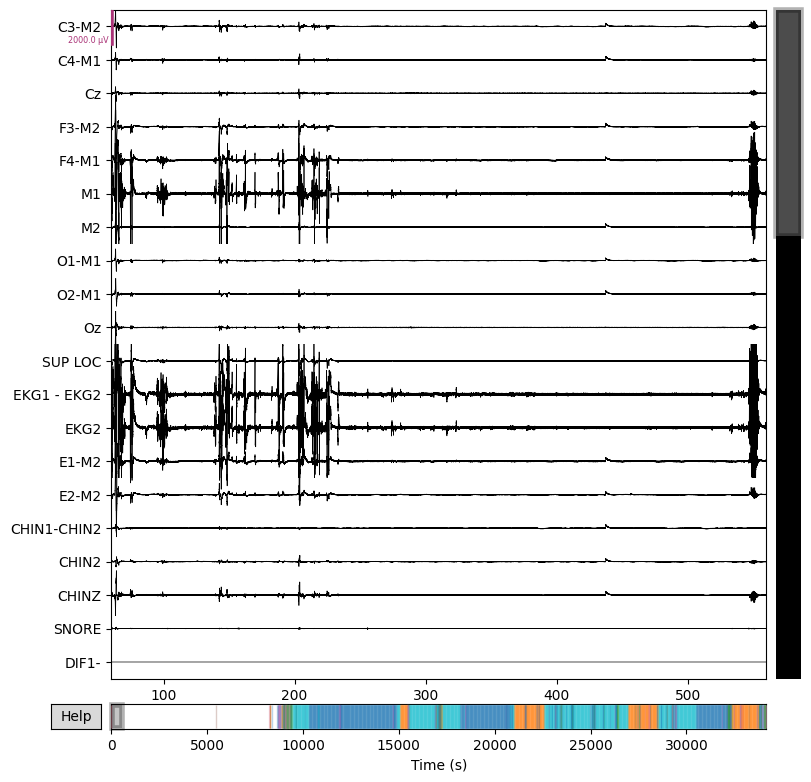

Channels marked as bad:
none


In [40]:
%matplotlib tk
raw_test.plot(start=60,
                    duration = 500,
                    scalings=dict(eeg=1e-3,resp=1e-3))

In [18]:
print(raw_test.ch_names)

['C3', 'C4', 'Cz', 'F3', 'F4', 'M1', 'M2', 'O1', 'O2', 'Oz', 'SUP LOC', 'EKG1', 'EKG2', 'E1', 'E2', 'CHIN1', 'CHIN2', 'CHINZ', 'SNORE', 'DIF1-', 'THERM', 'DIF2-', 'CHEST', 'DIF3-', 'ABDM', 'DIF4-', 'ICEMG', 'DIF7-', 'RLEG', 'Diff11-', 'LLEG', 'Diff12-', 'KSNORE', 'KTHERM', 'Pressure', 'PFLOW', 'PSNORE', 'KAbdomen', 'KChest', 'Phase', 'XSum', 'XFlow', 'XVolume', 'Position', 'PPG', 'PTT', 'Pleth', 'CFLOW', 'LEAK', 'RATE', 'EtCO2', 'CPRESS', 'VTE', 'Set PS', 'CAPNO', 'TRIG', 'SpO2', 'PR', 'PulseQuality']


In [ ]:
# Reference multiple channels to different reference channels
reference_channels = ['E1','E2','CHIN1','F3','F4','C3','C4','O1','O2','EKG1']
target_channels =    ['M2','M2','CHIN2','M2','M1','M2','M1','M2','M1','EKG2']

ref_train=[] 
ren_channels = {
    "E1": "E1-M2",
    "E2": "E2-M2",
    "CHIN1": "CHIN1-CHIN2",
    "F3": "F3-M2",
    "F4" : "F4-M1",
    "C3" : "C3-M2",
    "C4": "C4-M1",
    "O1": "O1-M1",
    "O2": "O2-M1",
    "EKG1": "EKG1 - EKG2"
}

for ref, target in zip(reference_channels, target_channels):
    ref_data= mne.set_bipolar_reference(inst= raw_test,
                                        anode = ref, 
                                        cathode = target,
                                        copy = True,
                                           )
    ref_data = mne.rename_channels(info=raw_test.info,mapping=ren_channels,allow_duplicates=True)
    
    ref_train.append(ref_data)
    

In [35]:
print(raw_test.ch_names)

['C3-M2', 'C4-M1', 'Cz', 'F3-M2', 'F4-M1', 'M1', 'M2', 'O1-M1', 'O2-M1', 'Oz', 'SUP LOC', 'EKG1 - EKG2', 'EKG2', 'E1-M2', 'E2-M2', 'CHIN1-CHIN2', 'CHIN2', 'CHINZ', 'SNORE', 'DIF1-', 'THERM', 'DIF2-', 'CHEST', 'DIF3-', 'ABDM', 'DIF4-', 'ICEMG', 'DIF7-', 'RLEG', 'Diff11-', 'LLEG', 'Diff12-', 'KSNORE', 'KTHERM', 'Pressure', 'PFLOW', 'PSNORE', 'KAbdomen', 'KChest', 'Phase', 'XSum', 'XFlow', 'XVolume', 'Position', 'PPG', 'PTT', 'Pleth', 'CFLOW', 'LEAK', 'RATE', 'EtCO2', 'CPRESS', 'VTE', 'Set PS', 'CAPNO', 'TRIG', 'SpO2', 'PR', 'PulseQuality']


In [41]:
%matplotlib tk
raw_test.plot(start=60,
                    duration = 500,
                    scalings=dict(eeg=1e-3,resp=1e-3))
plt.show()

Channels marked as bad:
['C3-M2', 'C4-M1', 'Cz']


In [9]:
# ref_data = raw_test.rename_channels(mapping=ren_channels)


In [38]:
# new_channel_names = []
# new_channel_name = f"{ref}-{target}"
# new_channel_names.append(new_channel_name)
# ref_train[0].rename_channels({ch_name: new_ch_name for ch_name, new_ch_name in zip(ref_train[0].ch_names, new_channel_names)})

# # Plot the data with the customized channel names
# ref_train[0].plot(start=60,
#                     duration = 500,
#                     scalings=dict(eeg=1e-3,resp=1e-3))
# plt.show()

Using matplotlib as 2D backend.


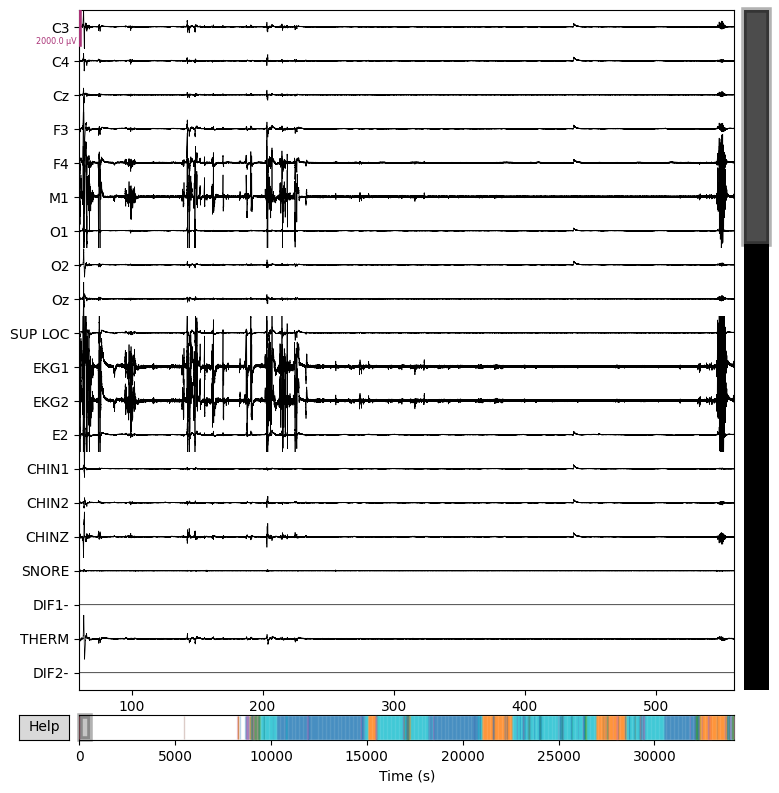

In [16]:
%tk 
ref_train[0].plot(start=60,
                    duration = 500,
                    scalings=dict(eeg=1e-3,resp=1e-3))
plt.show()

In [18]:
# Checking for projectors 
print(total_train[0].info['projs'])


[]


In [53]:
#Checking for annotations
total_train[0].annotations

<Annotations | 1134 segments: Artifact (68), Body Position: Prone (2), ...>

In [14]:
events = {'Sleep stage N1': 35,
  'Sleep stage N2': 36,
  'Sleep stage N3': 37,
  'Sleep stage R': 38,
  'Sleep stage W': 39
}

In [15]:
epoched = mne.Epochs(raw = total_train[0],events =events,on_missing='warn',tmin=0.0,
                    tmax=30,baseline = None,event_repeated='merge')

TypeError: events should be a NumPy array of integers, got <class 'dict'>

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


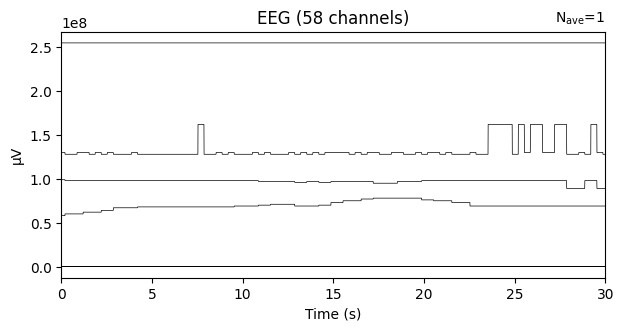

In [58]:
epoched[35].average().plot()
plt.show()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


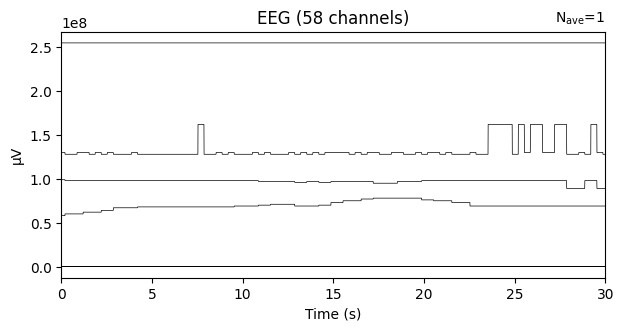

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


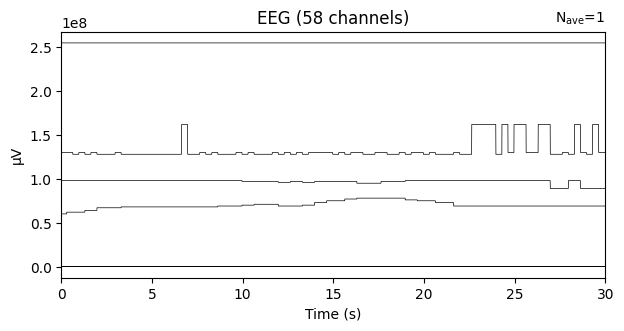

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


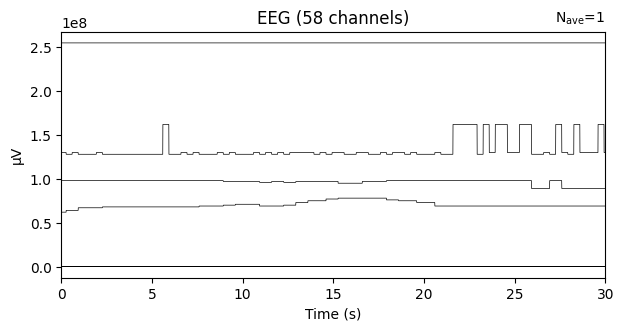

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


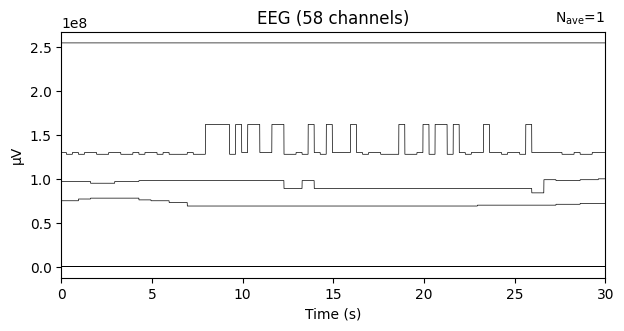

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


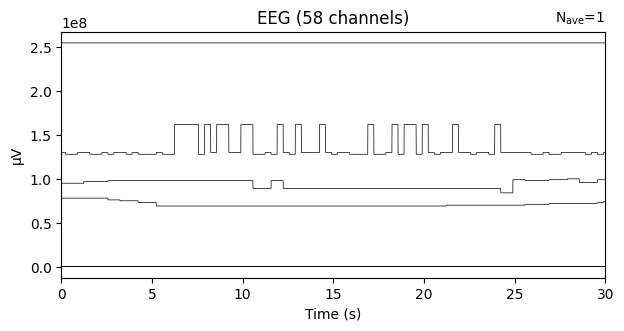

In [80]:
for value in events.values():
    epoched[value].average().plot()
    

In [4]:

# montage = mne.channels.read_custom_montage(raw_data[0])
# print(montage)

# raw.set_montage(montage, set_dig=True)```
# epoched[35].average().plot_topomap()

In [54]:
epochs_data = []
tmax = 30
for i in range(0,5):
    events,events_id = mne.events_from_annotations(total_train[0])
    epochs_train = mne.Epochs(raw=total_train[i], 
                              events=events, 
                              on_missing='warn', 
                              tmin=0.0, 
                              tmax=tmax, 
                              baseline=None,
                             event_repeated = 'merge')
    # epochs_train.drop_bad()
    epochs_data.append(epochs_train)

Used Annotations descriptions: ['Artifact', 'Body Position: Prone', 'Body Position: Right', 'Body Position: Supine', 'Breakout box disconnected.', 'Breakout box reconnected.', 'Breathe through mouth only (10 seconds)', 'Central Apnea', 'Close Eyes (30 seconds)', 'EEG arousal', 'Eye Blinks X5', 'Eyes Left and Right X5', 'Eyes Up and Down X5', 'Flex Left Foot', 'Flex Right Foot', 'Gain/Filter Change', 'Grit Teeth or Chew (5 seconds)', 'Hiccup', 'Impedance at 25 kOhm', 'Lights Off', 'Montage:UMMC NDx PSG Tx Split [02]', 'Name/DOB', 'Open Eyes (30 sec)', 'Oxygen Desaturation', 'PT MOTHER ASK FOR BLANKET', 'Press Lips', 'Pulse Rate Event: Low perfusion', 'Pulse Rate Event: Pulse search', 'Pulse Rate Event: Sensor off', 'Pulse Rate Threshold Event', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Simulate Snore or Hum (5 seconds)', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'SpO2 Event: Pulse s

In [66]:
# events,events_id = mne.events_from_annotations(total_train[0])
# events_id


In [ ]:
evoked = epochs_data[0].average()

In [ ]:
list(epochs_data)

In [ ]:
evoked.plot()
plt.show()

### Visualizing using different methods

In [ ]:
channel_names = total_train[0].ch_names


In [61]:
# Method 1: Time Series Plot

# Assuming 'eeg_data' is a list or array containing EEG data over time
# epochs_data = np.random.rand(10, 8)  # Replace this with your actual EEG data

# plt.figure(figsize=(10, 6))
# for electrode in range(eeg_data.shape[1]):
#     plt.plot(epochs_data[:, electrode], label=f'Electrode {electrode + 1}')

# plt.xlabel('Time')
# plt.ylabel('Voltage')
# plt.title('EEG Time Series Plot')
# plt.legend()
# plt.show()


In [1]:
# Topographical method
# Assuming 'eeg_data' is a 2D array where each row corresponds to a trial
# eeg_data = np.random.rand(10, 1000)  # Replace this with your actual EEG data

# avg_erp = np.mean(eeg_data, axis=0)

# plt.plot(avg_erp)
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.title('Event-Related Potentials (ERP)')
# plt.show()



In [ ]:
total_train = np.random.rand(10, 1000)  # Replace this with your actual EEG data

avg_erp = np.mean(total_train, axis=0)

plt.plot(avg_erp)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Event-Related Potentials (ERP)')
plt.show()


In [ ]:
total_train[0].pick(picks="stim").plot(start=3, duration=6)

In [ ]:
total_train[0].info

In [ ]:
for i in range(len(total_train)):
    print(f"This is the graph of EDF {total_train[i]}")
    total_train[i].plot(start=60,duration = 120,scalings=1e-3)
    plt.show()

In [ ]:

# raw_train =[]
# for i in range(len(yes_data)):
#     print(raw_data[i] + "  hello there")
#     raw = mne.io.read_raw_edf(raw_data[i],infer_types=False,preload=False)
#     # print(raw.info)
#     raw_train.append(raw)
#     break;


In [ ]:
# type(raw_train[0])

In [ ]:
# for i in range(len(total_train)):
#     print (f'The number of channels in data {i+1} is' ,len(total_train[i].ch_names))

In [ ]:
spectrum = total_train[0].compute_psd()

In [ ]:
spectrum.plot(average=True, picks="data", exclude="bads")

In [ ]:
channel_names = total_train[0].ch_names
channel_names

In [ ]:
# %matplotlib tk
# total_train[0].plot(start=60,
#                       duration = 200000,
#                       scalings=dict(eeg=1e-3,resp=1e-3),
#                    )
# plt.show()

In [ ]:
# total_train[0].get_channel_types(picks=channel_names)

In [ ]:
total_train[0].info.keys()

In [ ]:
print(mne.pick_channels(total_train[0].info["ch_names"],include=[]))


In [ ]:
evoked.plot_projs_topomap(ch_type = 'eeg')

In [ ]:
spectrum.plot_topo()

In [ ]:
total_train[0].plot_sensors(ch_type="eeg")

In [ ]:
total_train[0].plot_projs_topomap(colorbar=True)

In [ ]:
# csv_file = pd.read_csv("/Users/niraj/Desktop/Research Works/OneDrive_1_1-19-2024/Study Sample List-4-Wang.20231220.csv")
# df = pd.DataFrame(csv_file,)

In [ ]:
# df[df['Adiease']=='Y']['recode_id']
# [i + '.EDF' for i in df[df['Adiease']=='Y']['recode_id']]

In [ ]:

# raw_train[i].plot(start=60,
#                       duration = 120,
#                       scalings=dict(eeg=1e-3,resp=1e-3),title = f"EDF{i}" )

In [ ]:
# for i in range(len(raw_train)):
#     if yes_patients in raw_data:
#         raw_train[i].plot(start=60,
#                       duration = 120,
#                       scalings=dict(eeg=1e-3,resp=1e-3),title = f"EDF{i}" )
#         print(f"This is the graph of {raw_train[i]}")
    
#         plt.show()
#     else:
#         print("something is wrong")
        


In [ ]:
# for i in range(len(raw_train)):
#     raw_train[i].plot(start=60,
#                       duration = 120,
#                       scalings=dict(eeg=1e-3,resp=1e-3),title = f"EDF{i}" )
#     print(f"This is the graph of {raw_train[i]}")
    
#     plt.show()
    

In [ ]:
# raw_train[i].plot(start=60,
#                       duration = 120,
#                       scalings=dict(eeg=1e-3,resp=1e-3),title = f"EDF{i}" )